## Customer Churn Analysis Project
*Customer churn analysis is an essential step in business and marketing which entails assessing and forecasting attrition rates. Companies can execute focused customer retention strategies by examining historical data to find patterns and variables contributing to client churn. Businesses can better understand customer behavior, preferences, and pain points by doing customer churn analysis. By proactively addressing possible churn triggers like subpar customer service or unsatisfactory products, Businesses can increase client retention, lower churn, and eventually increase profitability, 
promoting long-term success and sustainable growth in a cut throat market.*

*The project will involve determining the main triggers for the attrition and deploy machine learning models which will help in prediction of Customer's Churn behaviour*

In [4]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis

In [5]:
#Reading the file
df=pd.read_csv("Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
#Description of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [64]:
#Checking for null values
df.isna().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Tenure Cohort       0
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

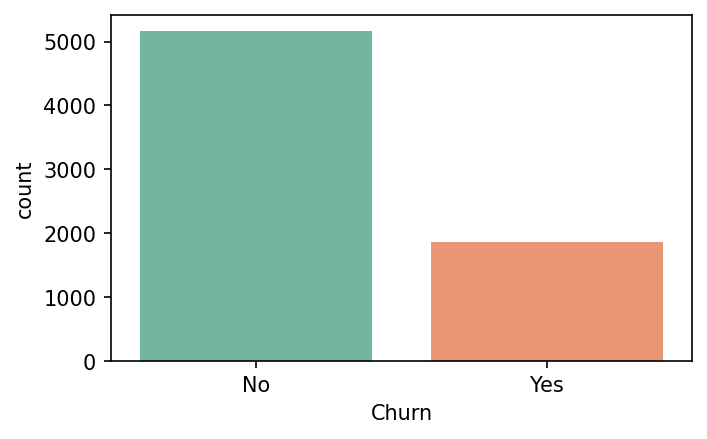

In [14]:
#Checking the no.of churned customer
plt.figure(figsize=(5,3),dpi=150)
sns.countplot(data=df,x="Churn",palette="Set2")

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

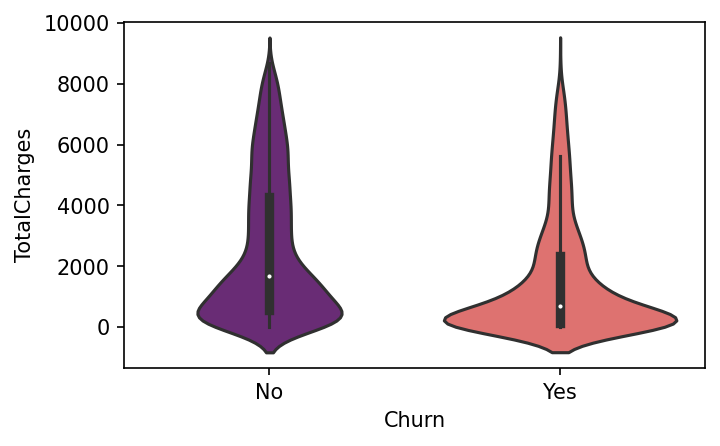

In [16]:
#Checking the distribution of total charges in the Churn Categories
plt.figure(figsize=(5,3),dpi=150)
sns.violinplot(data=df,x="Churn",y="TotalCharges",palette="magma")

#Most of the customers that have churned having total charges less compared to those who haven't churned.

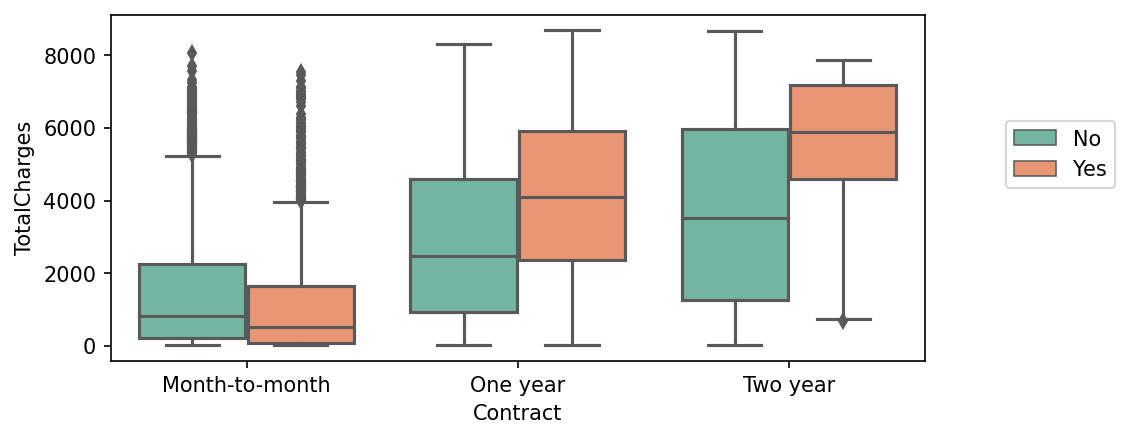

In [19]:
#Distribution of Total charges with contract_type and Churn Behaviour
plt.figure(figsize=(7,3),dpi=150)
sns.boxplot(data=df,x="Contract",y="TotalCharges",hue='Churn',palette="Set2")
plt.legend(loc=(1.1,0.5))

In [20]:
#Churned customer correlation with other categorical variables
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()
df2=corr_df['Churn_Yes'].sort_values().iloc[1:-1]
df2.values

array([-0.30155234, -0.22757762, -0.22757762, -0.22757762, -0.22757762,
       -0.22757762, -0.22757762, -0.22757762, -0.19145432, -0.17822502,
       -0.17126992, -0.16471591, -0.16312844, -0.14998193, -0.13468684,
       -0.12414143, -0.118136  , -0.09077285, -0.08230697, -0.06619252,
       -0.0326536 , -0.0116914 , -0.0116914 , -0.00854464,  0.00854464,
        0.0116914 ,  0.04003274,  0.06085994,  0.06325398,  0.12843503,
        0.1309203 ,  0.14998193,  0.15054105,  0.16312844,  0.19145432,
        0.25205563,  0.26759512,  0.30145464,  0.30746259,  0.3368771 ,
        0.3422352 ,  0.40456455])

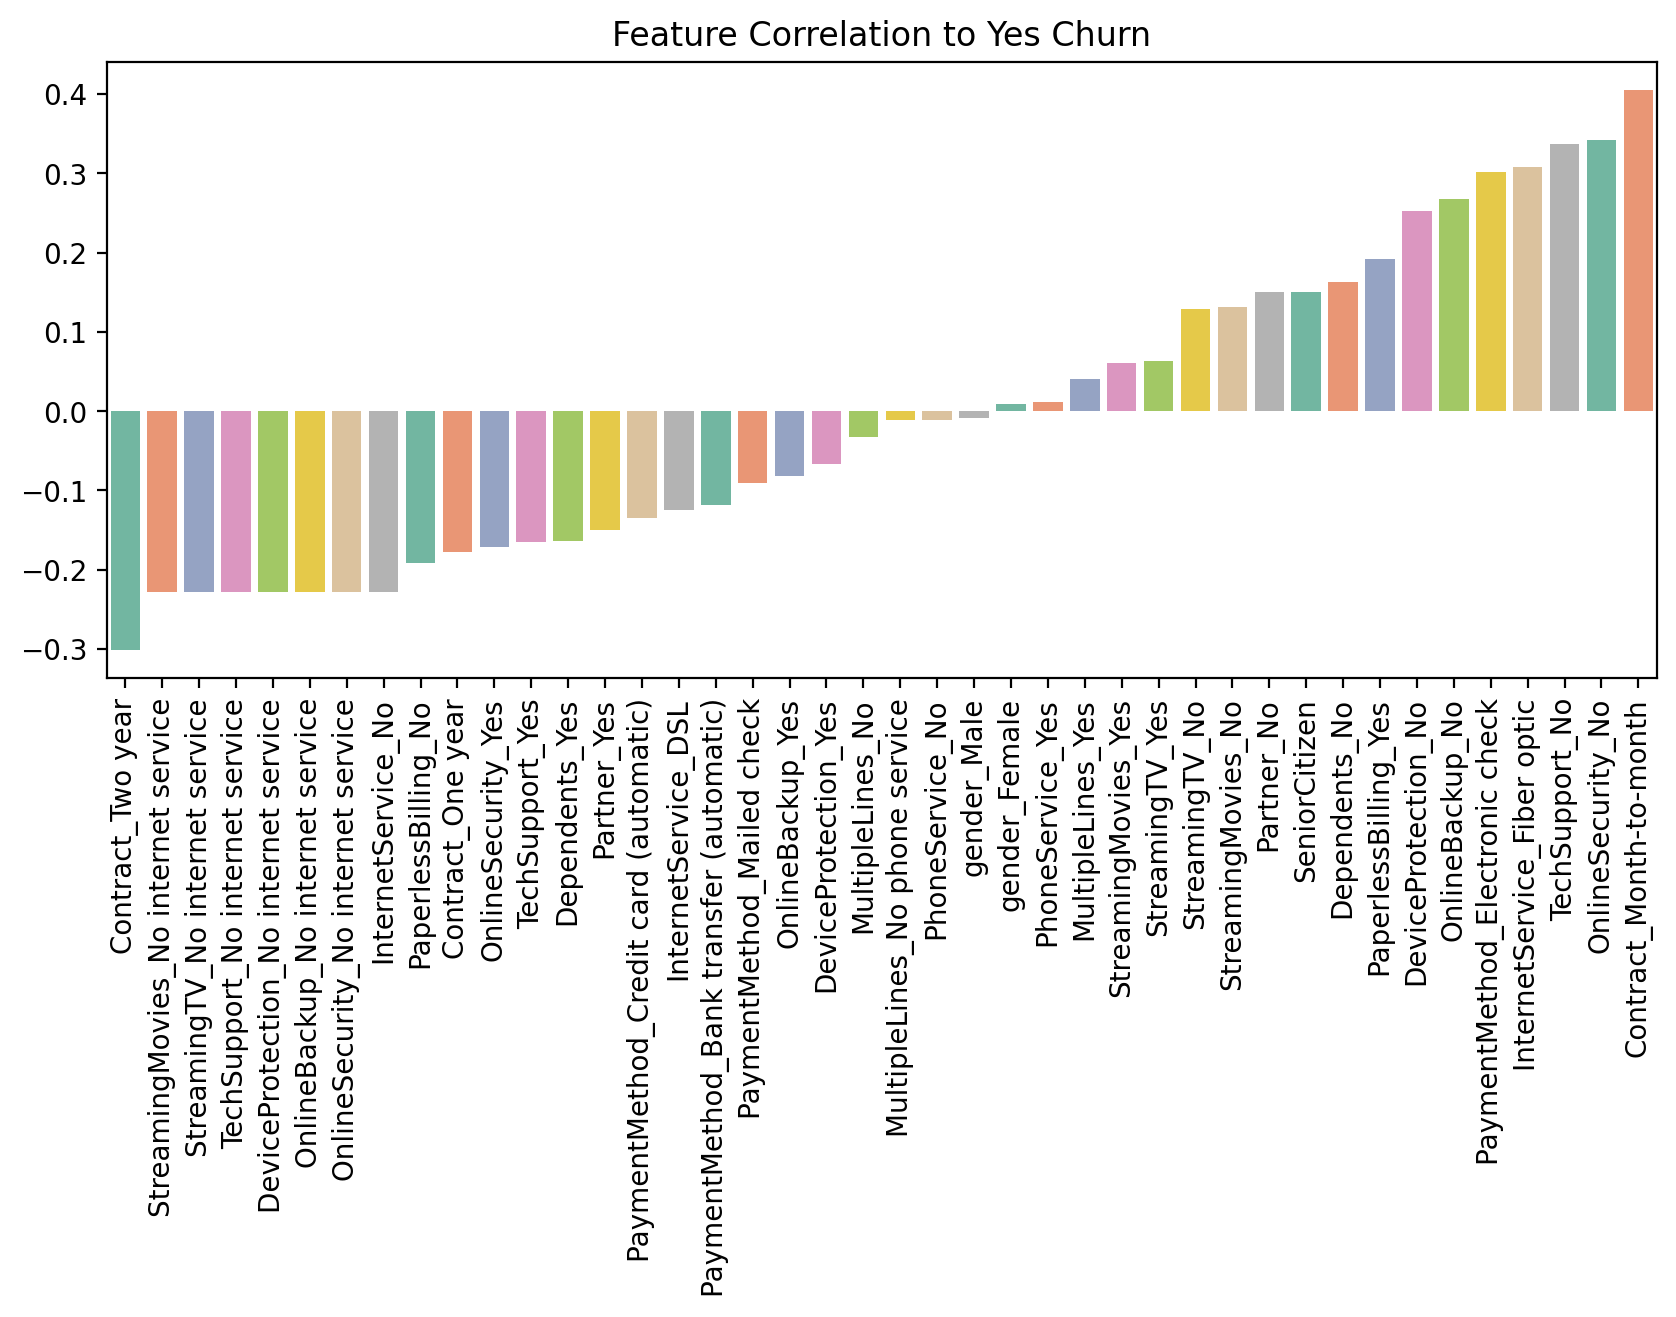

In [22]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=df2.index,y=df2.values,palette='Set2')
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

<AxesSubplot:xlabel='tenure', ylabel='Count'>

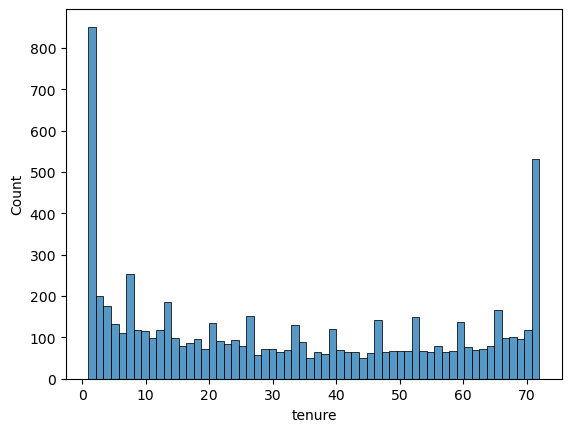

In [23]:
#Distribution of tenure (i.e how many months customer had been with the company)
sns.histplot(data=df,x='tenure',bins=60)

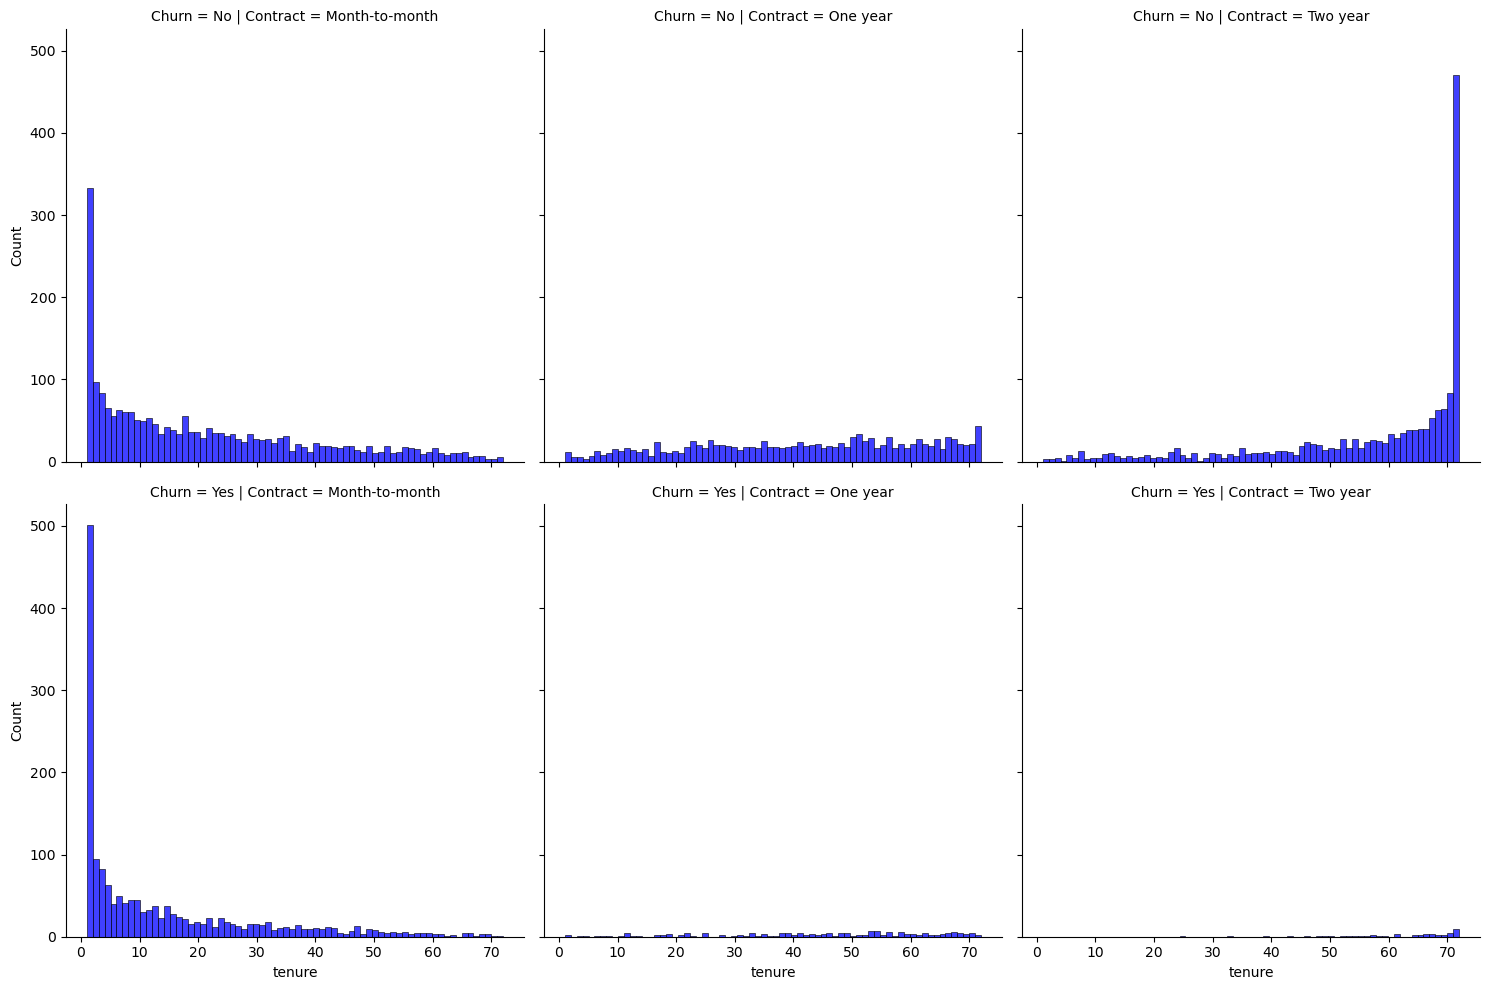

In [26]:
#Exploring the distribution of tenure with contract type and churn type
sns.displot(data=df,x='tenure',bins=70,col="Contract",row='Churn',color='blue')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

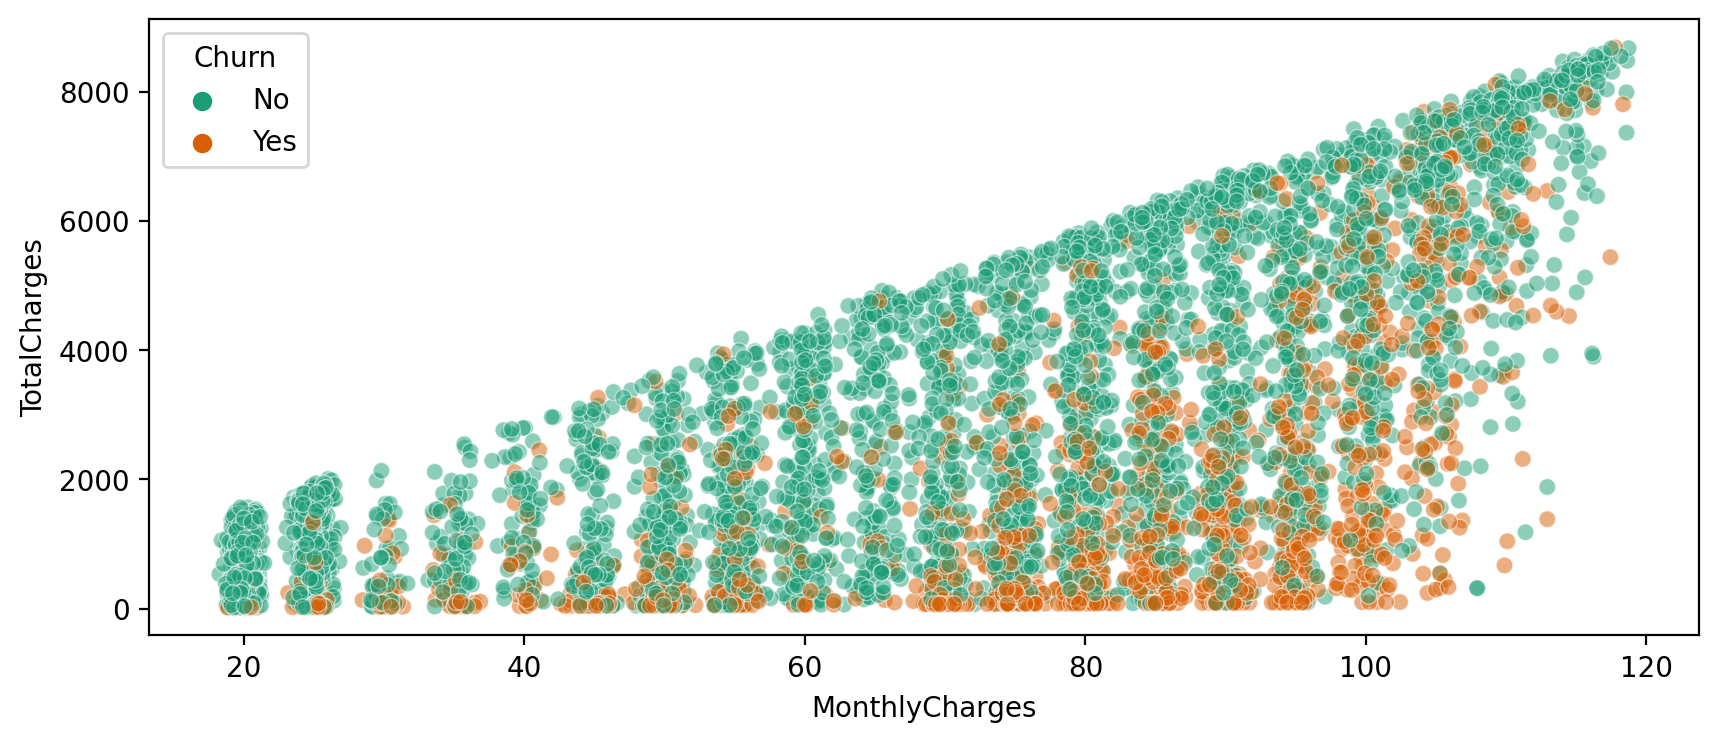

In [27]:
#Exploring the Total charges vs Monthly charges seprated by churn
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,y="TotalCharges",x="MonthlyCharges",hue="Churn",alpha=0.5,palette='Dark2')

In [29]:
#Creating groups based upon tenure
churn_yes=df.groupby(["Churn","tenure"]).count().transpose()['Yes']
churn_no=df.groupby(["Churn","tenure"]).count().transpose()['No']

churn_rate=100*churn_yes/(churn_no+churn_yes)

Text(0, 0.5, 'Churn_percentage')

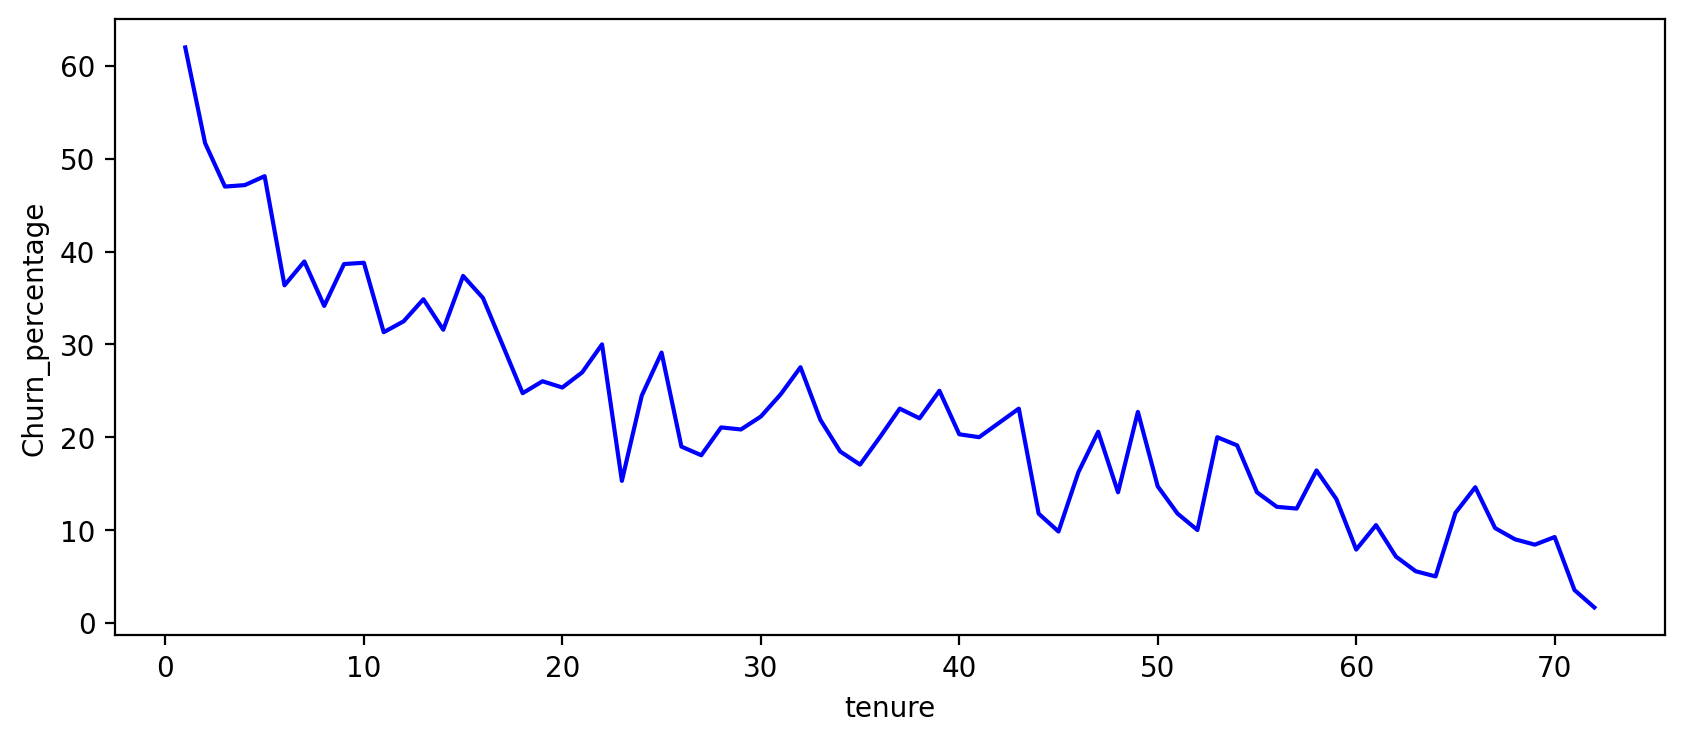

In [31]:
#Variation of Churn percentage with tenure
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot(color="Blue")
plt.ylabel("Churn_percentage")

In [32]:
#Lets create broader cohorts
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [33]:
df['Tenure Cohort'] = df['tenure'].apply(cohort)

In [34]:
df.head(10)[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
5,8,0-12 Months
6,22,12-24 Months
7,10,0-12 Months
8,28,24-48 Months
9,62,Over 48 Months


<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

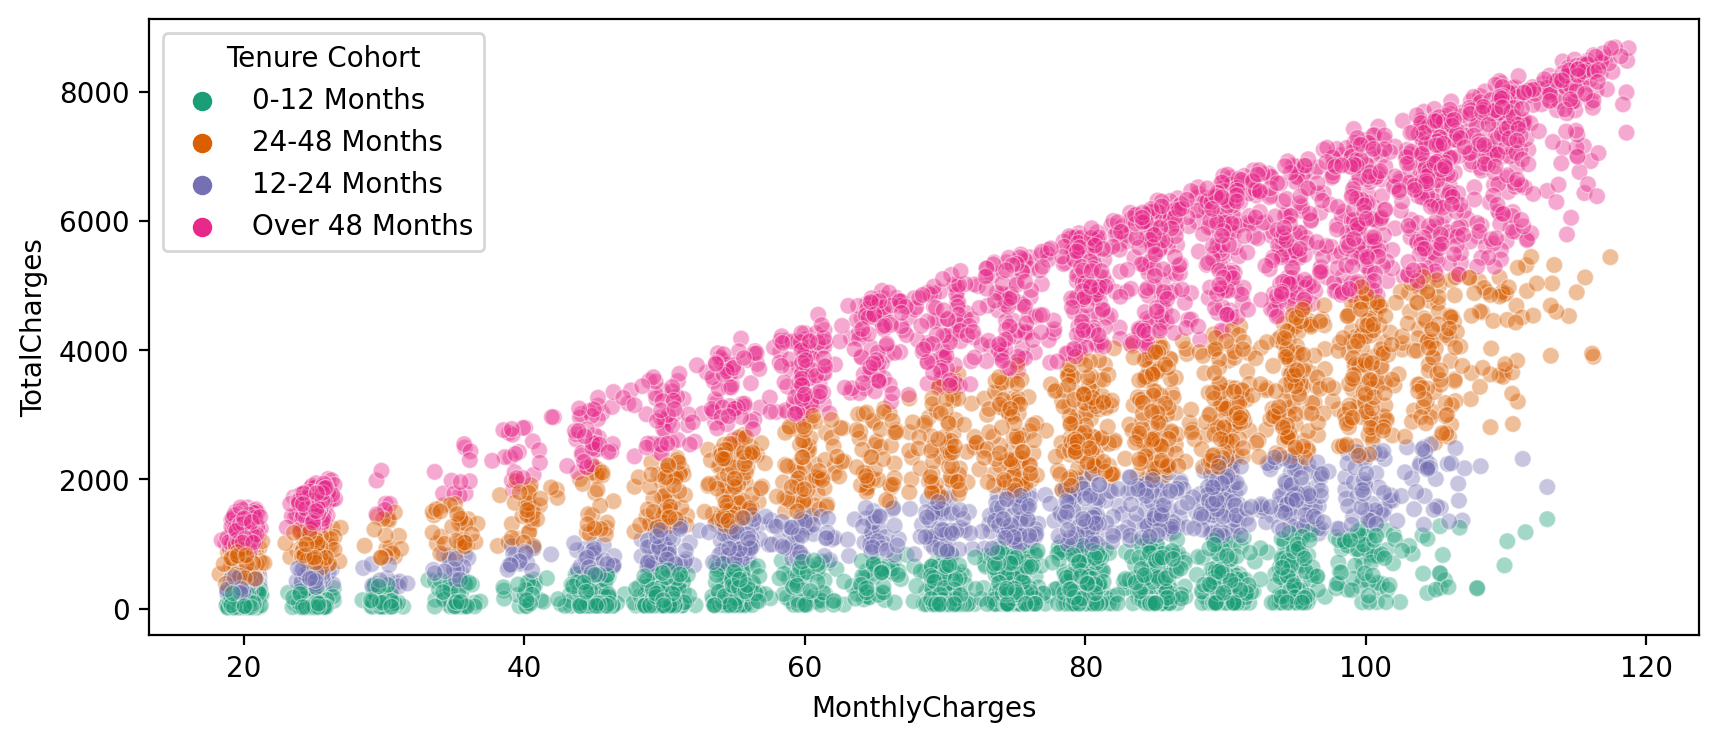

In [37]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",hue="Tenure Cohort",palette="Dark2",alpha=0.4)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

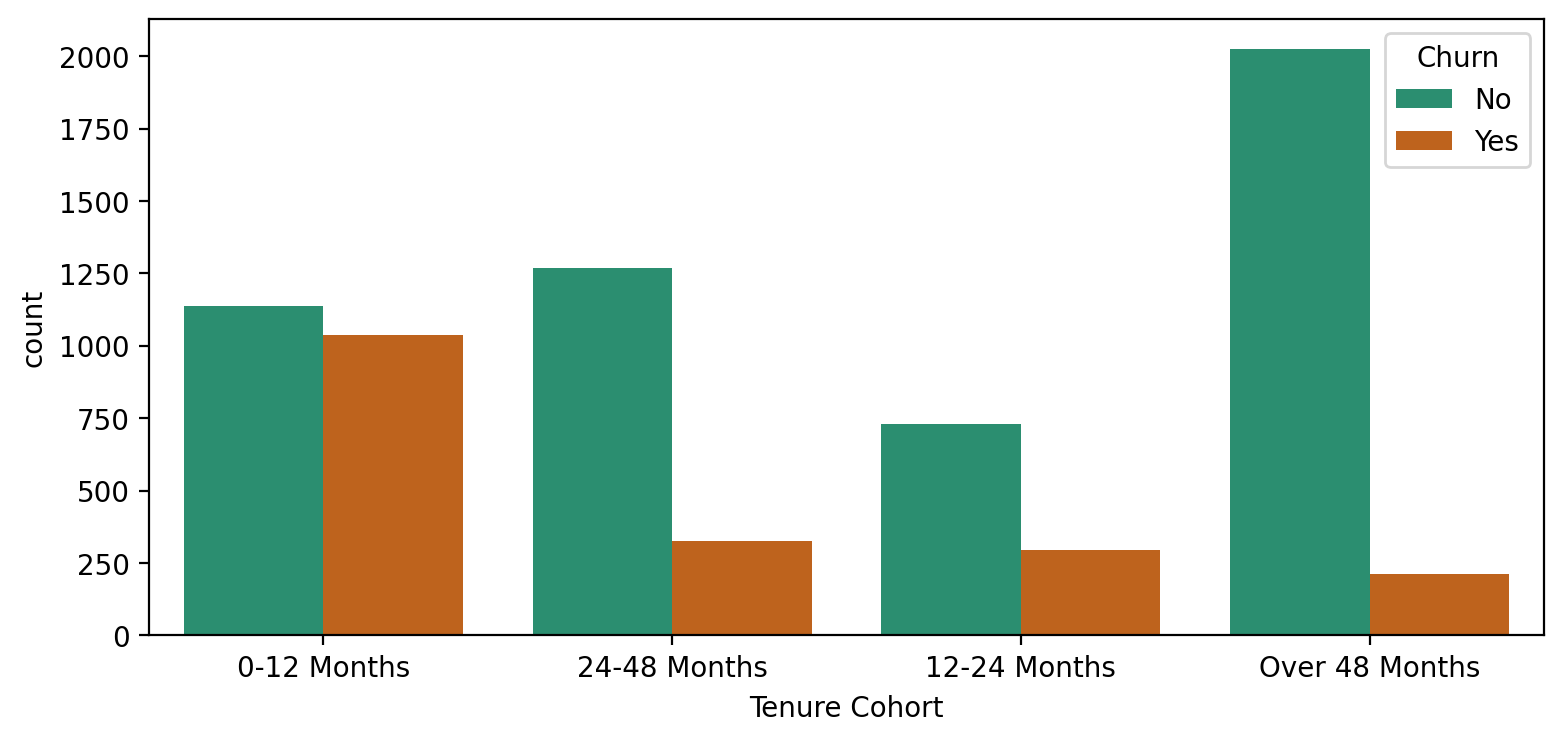

In [39]:
#Churn count per cohort
plt.figure(figsize=(9,4),dpi=200)
sns.countplot(data=df,x="Tenure Cohort",hue="Churn",palette="Dark2")

<Figure size 2000x800 with 0 Axes>

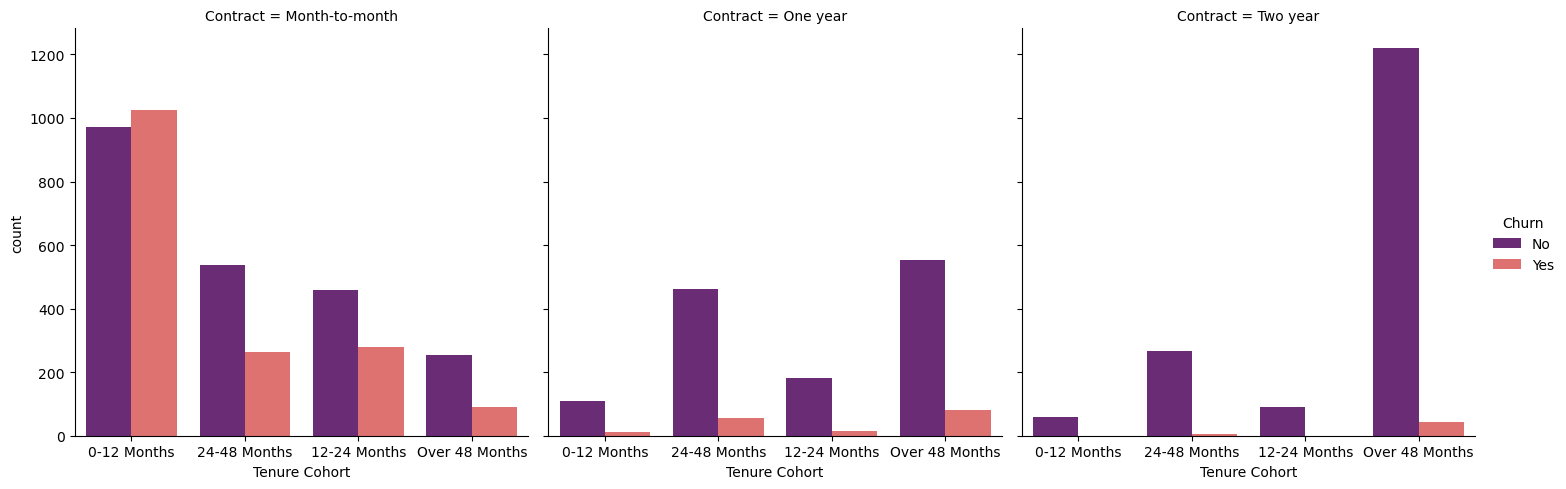

In [42]:
#Variation based upon contract type and churn
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count',palette="magma")

**Conclusion:**
*The analysis made above draws following conclusions:*
*1.The churn is prominent in month to month contract type.*
*2.Churn percentage decreases with increase in their relatioship tenure with the company*
*3.Churn is more with persons having tenure in the range of 0-12 months *

### Predictive Modelling

In [50]:
#Separating the Features and labels
X=df.drop(["customerID","Churn"],axis=1)
X=pd.get_dummies(X,drop_first=True)
y=df['Churn'].replace(["Yes","No"],[1,0])


0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [51]:
#Performing Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.10, random_state=101)

In [85]:
#Using Logistic Regression
from sklearn.linear_model import LogisticRegression
class_weights = {0: 0.34, 1: 0.66}
log=LogisticRegression(max_iter=300,class_weight=class_weights)

In [86]:
#A function to display the results
from sklearn.metrics import plot_confusion_matrix,classification_report

def result(model):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(classification_report(y_test,pred))
    plot_confusion_matrix(model,X_test,y_test)
    

              precision    recall  f1-score   support

           0       0.91      0.81      0.85       557
           1       0.48      0.68      0.56       147

    accuracy                           0.78       704
   macro avg       0.69      0.74      0.71       704
weighted avg       0.82      0.78      0.79       704



C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


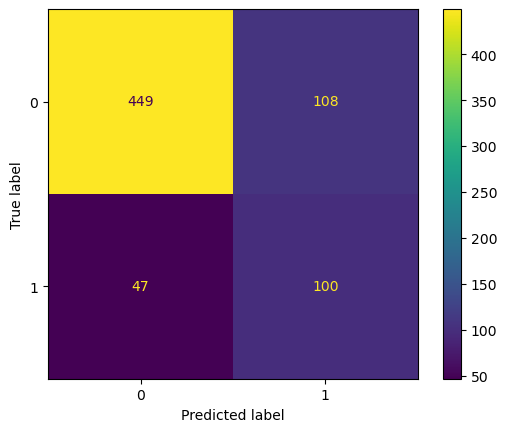

In [84]:
#Results of Logistic Regression
result(log)

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=6)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       557
           1       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


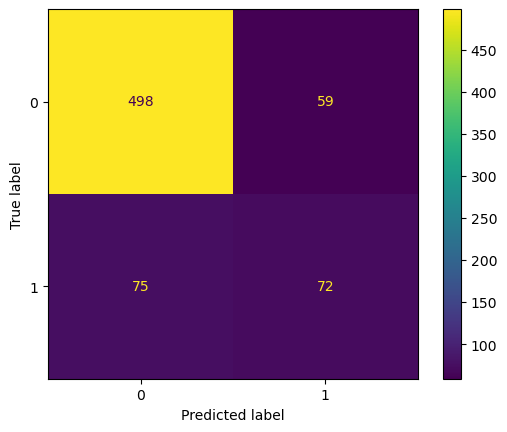

In [94]:
#Results of Decision Tree
result(dt)

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=120,max_features=8,bootstrap=True)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       557
           1       0.50      0.48      0.49       147

    accuracy                           0.79       704
   macro avg       0.68      0.68      0.68       704
weighted avg       0.79      0.79      0.79       704



C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


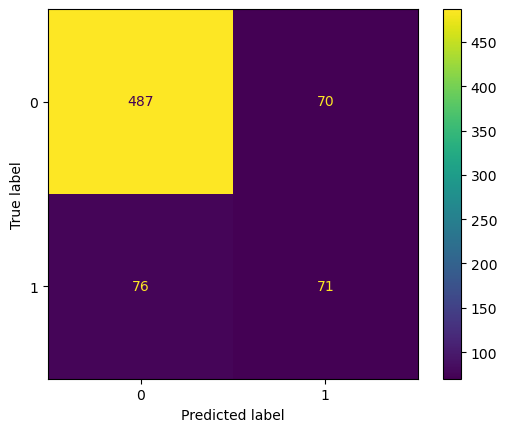

In [104]:
#Results of Random Forest Classifier
result(rfc)

**The accuracy of model after trying 3 models namely Logistic Regression,Decision Tree and Random Forest is about 81%**
#### Final Accuracy = 81%